**Data Import**

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 79.8MB/s]


In [4]:
!ls

diabetes-prediction-dataset.zip  kaggle.json  sample_data


In [5]:
from zipfile import ZipFile
dataset = '/content/diabetes-prediction-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

diabetes_prediction_dataset.csv  diabetes-prediction-dataset.zip  kaggle.json  sample_data


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
diabetes_data = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [9]:
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


**Number of missing values**

In [10]:
missing_values = diabetes_data.isnull().sum()

print("Number of missing values in each attribute:")
print(missing_values)

Number of missing values in each attribute:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


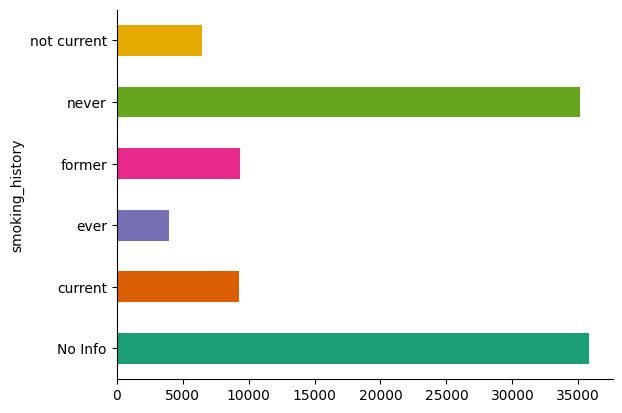

In [ ]:
# @title smoking_history


diabetes_data.groupby('smoking_history').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

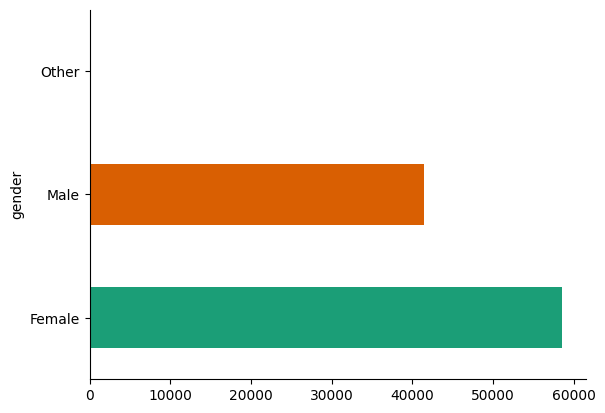

In [ ]:
# @title gender


diabetes_data.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

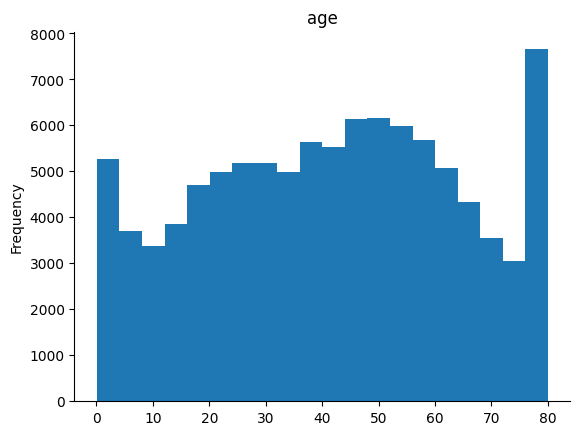

In [ ]:
# @title age
diabetes_data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Box Plots of numeric attributes**

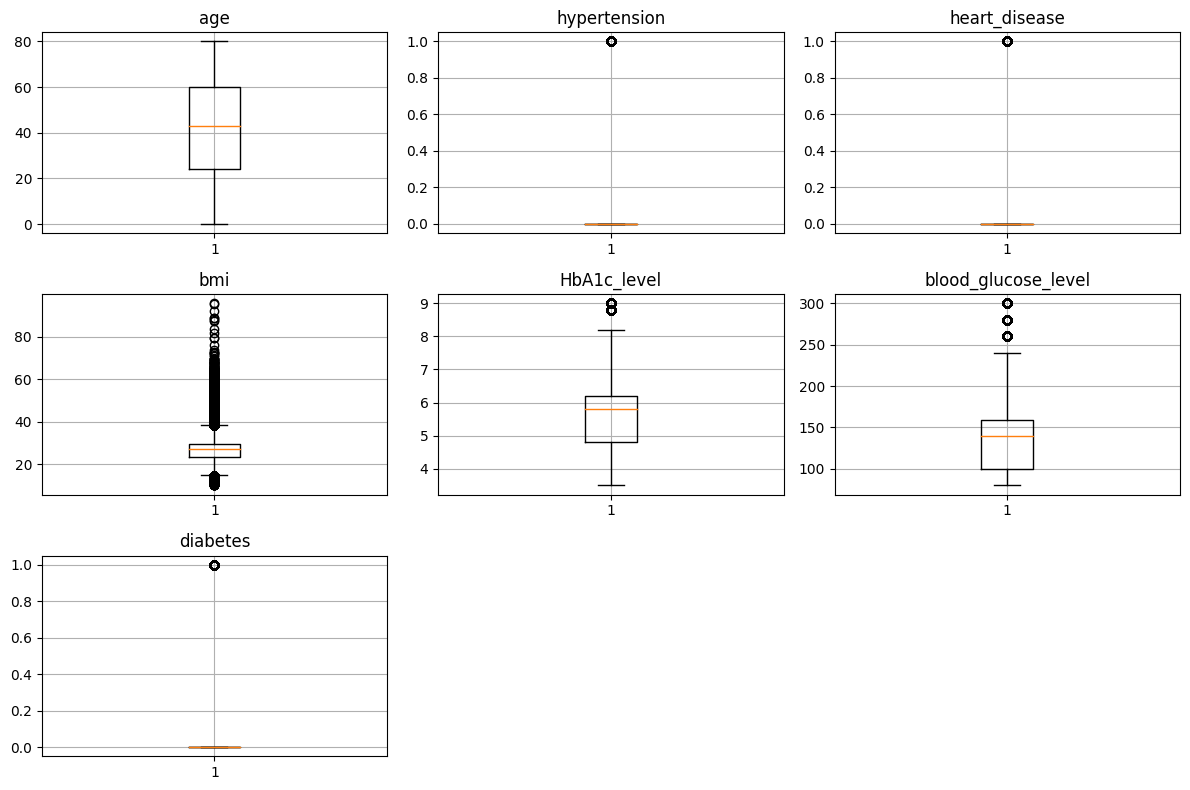

In [ ]:
numeric_columns = diabetes_data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(3, 3, i+1)
    plt.boxplot(diabetes_data[column])
    plt.title(column)
    plt.grid(True)

plt.tight_layout()
plt.show()


**Histogram for ordinal attribute**

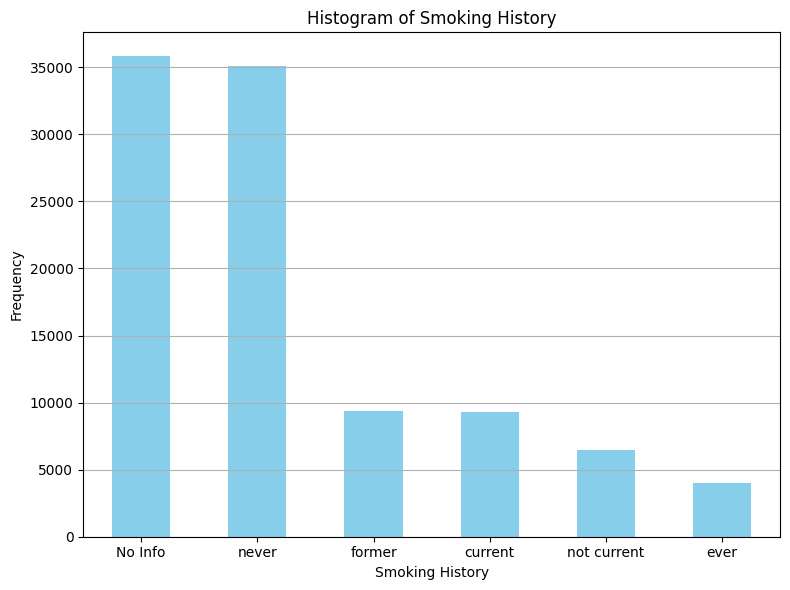

In [ ]:
plt.figure(figsize=(8, 6))
diabetes_data['smoking_history'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histogram of Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Mode for categorical attributes**

In [ ]:
categorical_attributes = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

for attribute in categorical_attributes:
    mode = diabetes_data[attribute].mode()
    print(f"Mode for '{attribute}': {mode.values.tolist()}")


Mode for 'gender': ['Female']
Mode for 'hypertension': [0]
Mode for 'heart_disease': [0]
Mode for 'smoking_history': ['No Info']
Mode for 'diabetes': [0]


**Bar Charts**

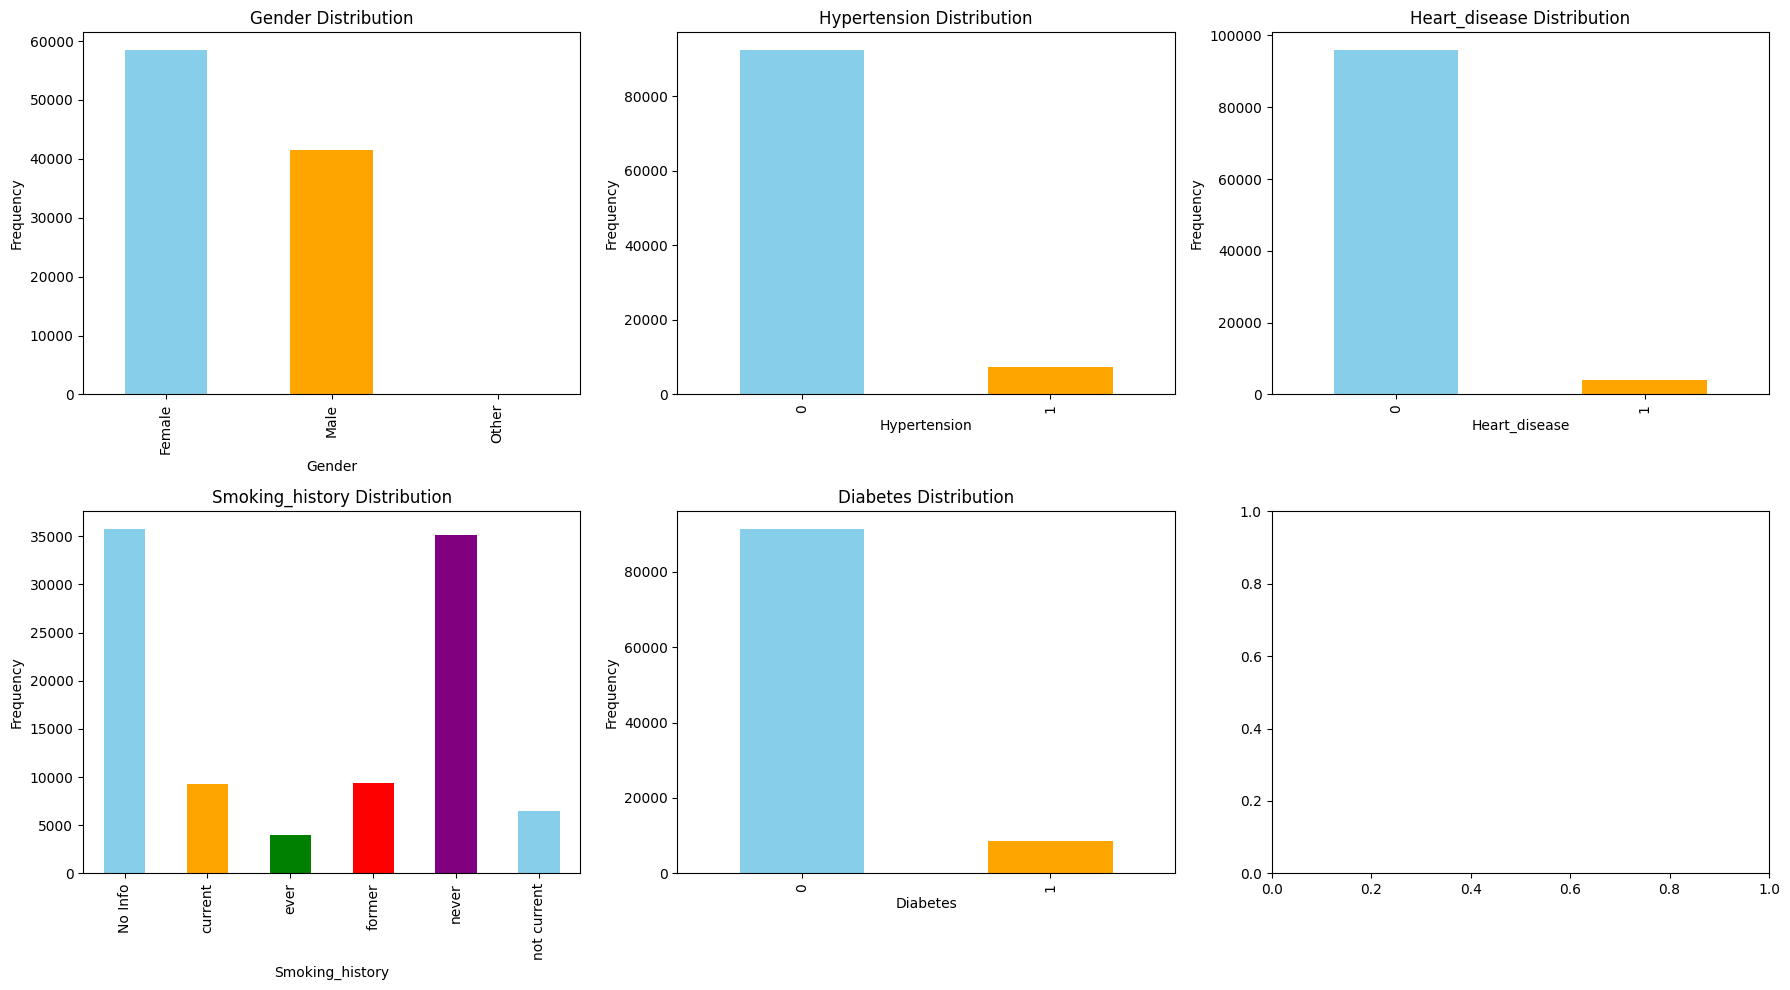

In [55]:
import matplotlib.pyplot as plt

# Define categorical attributes
categorical_attributes = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flatten axes
axes = axes.flatten()

# Iterate over each categorical attribute and plot stacked bar chart
for i, attribute in enumerate(categorical_attributes):
    # Calculate value counts for each category
    counts = diabetes_data.groupby(attribute).size()

    # Plot stacked bar chart
    counts.plot(kind='bar', stacked=True, ax=axes[i], color=['skyblue', 'orange', 'green', 'red', 'purple'])

    # Set labels and title
    axes[i].set_title(f'{attribute.capitalize()} Distribution')
    axes[i].set_xlabel(attribute.capitalize())
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()



**Stacked vertical bar chart**

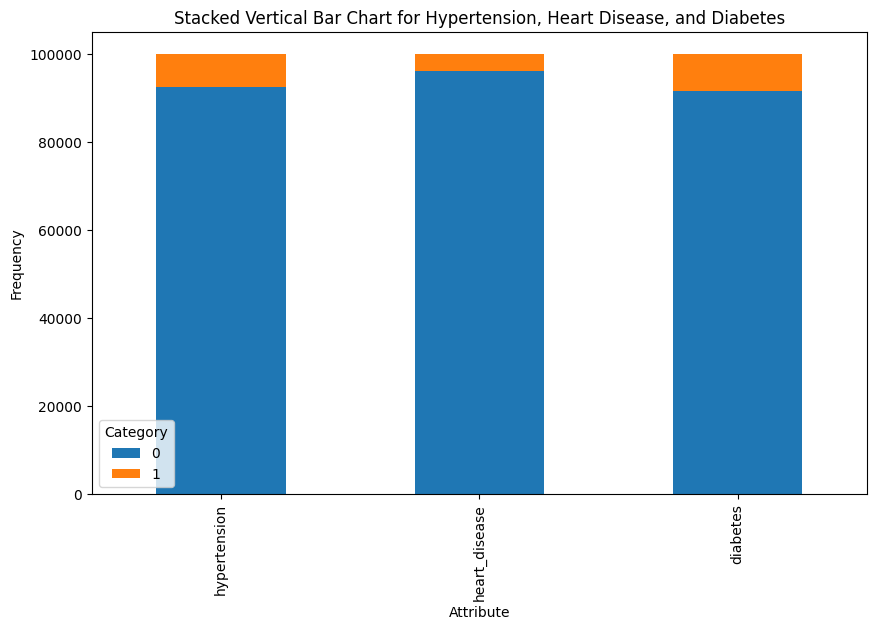

In [56]:
import matplotlib.pyplot as plt


categorical_attributes = ['hypertension', 'heart_disease', 'diabetes']


category_counts = diabetes_data[categorical_attributes].apply(pd.Series.value_counts)


category_counts.T.plot(kind='bar', stacked=True, figsize=(10, 6))


plt.xlabel('Attribute')
plt.ylabel('Frequency')
plt.title('Stacked Vertical Bar Chart for Hypertension, Heart Disease, and Diabetes')


plt.legend(title='Category')
plt.show()


**Scatter plots of attributes**

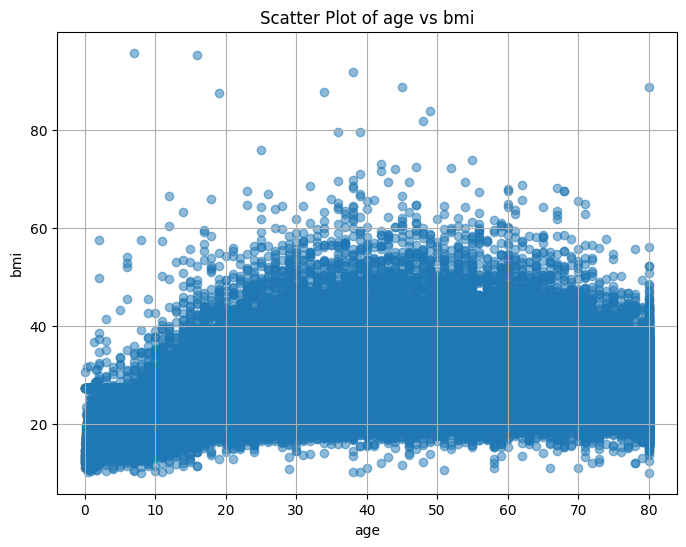

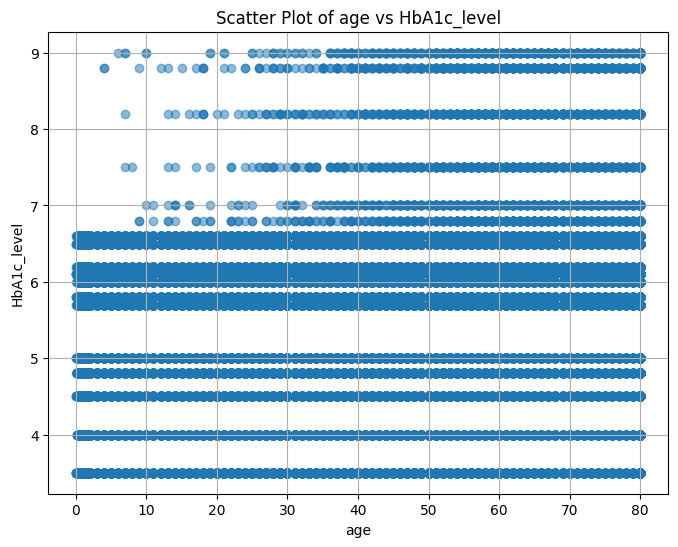

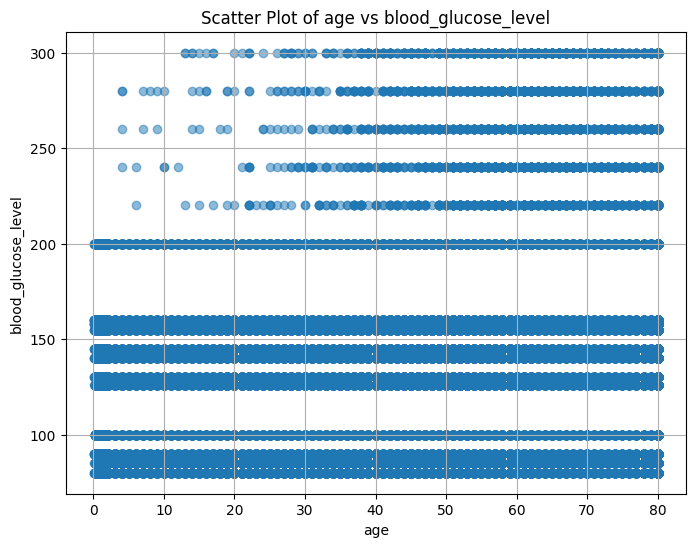

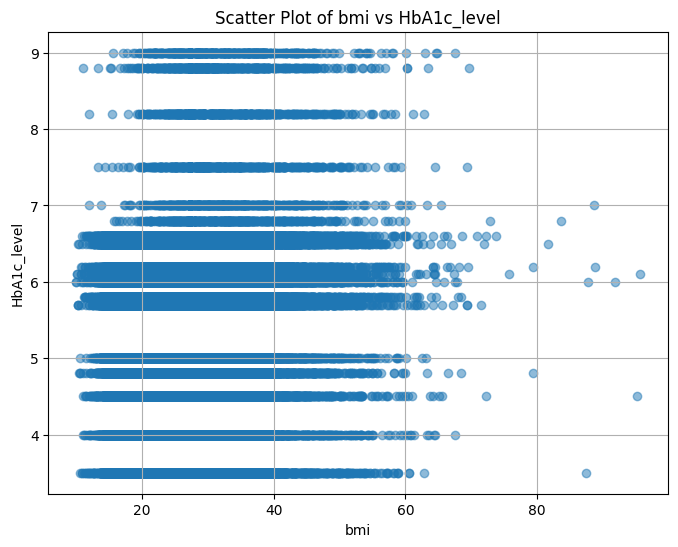

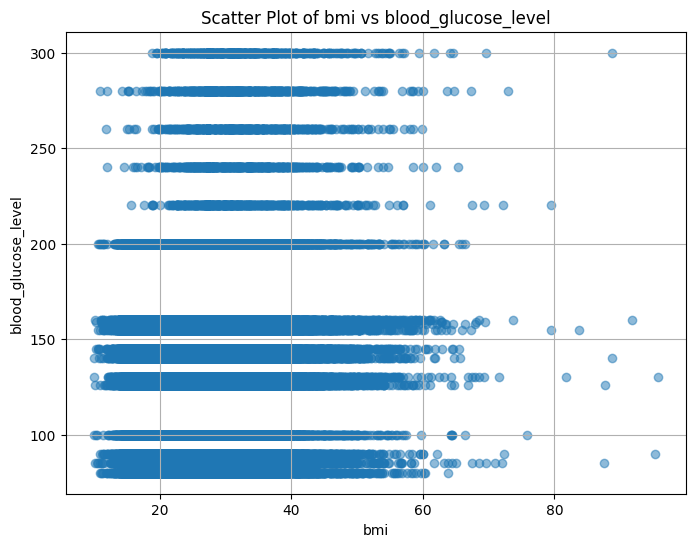

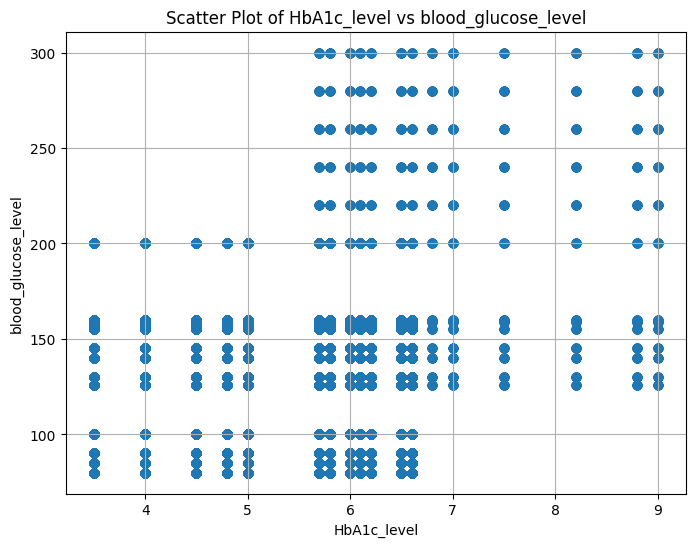

In [ ]:
numerical_attributes = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Drawing scatter plots for each pair of numerical attributes
for i in range(len(numerical_attributes)):
    for j in range(i + 1, len(numerical_attributes)):
        attribute_x = numerical_attributes[i]
        attribute_y = numerical_attributes[j]

        plt.figure(figsize=(8, 6))
        plt.scatter(diabetes_data[attribute_x], diabetes_data[attribute_y], alpha=0.5)
        plt.title(f'Scatter Plot of {attribute_x} vs {attribute_y}')
        plt.xlabel(attribute_x)
        plt.ylabel(attribute_y)
        plt.grid(True)
        plt.show()

**Size of the data**

In [11]:
diabetes_data.shape

(100000, 9)

In [12]:
diabetes_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


**Attribute Selection**

In [20]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# target variable
X = diabetes_data.drop(columns=['diabetes'])
y = diabetes_data['diabetes']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Handle categorical variables (if any) using one-hot encoding // Also applied one-hot encoding under the this tasks for gender
X_encoded = pd.get_dummies(X)

# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k=3)  # Select top 3 features
X_selected = selector.fit_transform(X_encoded, y_encoded)

selected_features = X_encoded.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

print("Selected features and their scores:")
for i in range(len(selected_features)):
    print(f"{selected_features[i]}: {feature_scores[i]}")

Selected features and their scores:
age: 7131.405852126005
HbA1c_level: 19122.21118354638
blood_glucose_level: 21363.054361421466


**Discretization**

In [51]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

diabetes_data = pd.read_csv('/content/diabetes_prediction_dataset.csv')

numeric_attributes = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

X_numeric = diabetes_data[numeric_attributes]

# Apply discretization using KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_numeric_discretized = discretizer.fit_transform(X_numeric)

X_numeric_discretized = pd.DataFrame(X_numeric_discretized, columns=numeric_attributes)

diabetes_data[numeric_attributes] = X_numeric_discretized

# Print original values of numeric attributes
print("Original values of numeric attributes:")
print(X_numeric.head())

# Print discretized values of numeric attributes
print("\nDiscretized values of numeric attributes:")
print(X_numeric_discretized.head())


Original values of numeric attributes:
    age    bmi  HbA1c_level  blood_glucose_level
0  80.0  25.19          6.6                  140
1  54.0  27.32          6.6                   80
2  28.0  27.32          5.7                  158
3  36.0  23.45          5.0                  155
4  76.0  20.14          4.8                  155

Discretized values of numeric attributes:
   age  bmi  HbA1c_level  blood_glucose_level
0  4.0  0.0          2.0                  1.0
1  3.0  1.0          2.0                  0.0
2  1.0  1.0          2.0                  1.0
3  2.0  0.0          1.0                  1.0
4  4.0  0.0          1.0                  1.0


**One-hot Encoding**

**Gender**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
categorical_columns = ['gender']

In [ ]:
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(diabetes_data[categorical_columns]).toarray()

In [ ]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))


In [ ]:
df_encoded = pd.concat([diabetes_data, encoded_df], axis=1)

In [ ]:
df_encoded.drop(categorical_columns, axis=1, inplace=True)

In [ ]:
print(df_encoded.head(20))



     age  hypertension  heart_disease smoking_history    bmi  HbA1c_level  \
0   80.0             0              1           never  25.19          6.6   
1   54.0             0              0         No Info  27.32          6.6   
2   28.0             0              0           never  27.32          5.7   
3   36.0             0              0         current  23.45          5.0   
4   76.0             1              1         current  20.14          4.8   
5   20.0             0              0           never  27.32          6.6   
6   44.0             0              0           never  19.31          6.5   
7   79.0             0              0         No Info  23.86          5.7   
8   42.0             0              0           never  33.64          4.8   
9   32.0             0              0           never  27.32          5.0   
10  53.0             0              0           never  27.32          6.1   
11  54.0             0              0          former  54.70          6.0   

In [ ]:
unique_categories = diabetes_data['gender'].unique()
print(unique_categories)

['Female' 'Male' 'Other']


**PCA**

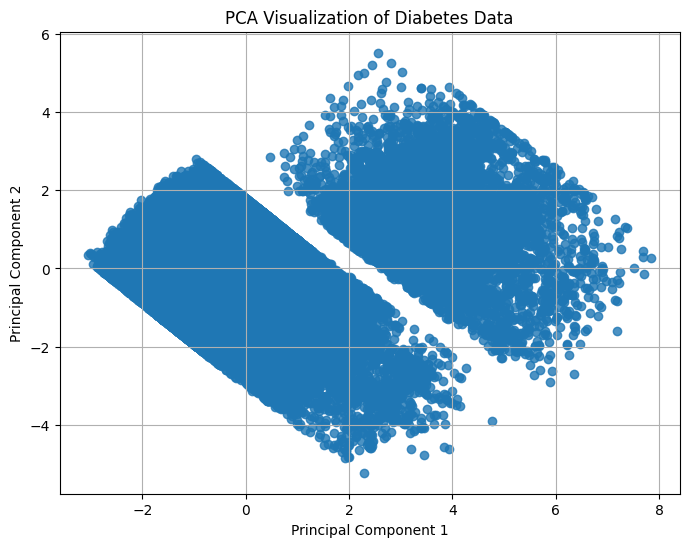

In [62]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Separate numeric features
numeric_features = diabetes_data.select_dtypes(include=['float64', 'int64']).columns

# Preprocessing: Standardize the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(diabetes_data[numeric_features])

# Apply PCA to reduce dimensionality to the number of original numeric features
pca = PCA(n_components=len(numeric_features))
X_pca = pca.fit_transform(X_scaled)


pc_columns = [f'PC{i+1}' for i in range(len(numeric_features))]
df_pca = pd.DataFrame(data=X_pca, columns=pc_columns, index=diabetes_data.index)


diabetes_data.drop(columns=numeric_features, inplace=True)
diabetes_data = pd.concat([diabetes_data, df_pca], axis=1)


plt.figure(figsize=(8, 6))
plt.scatter(diabetes_data['PC1'], diabetes_data['PC2'], alpha=0.8)
plt.title('PCA Visualization of Diabetes Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



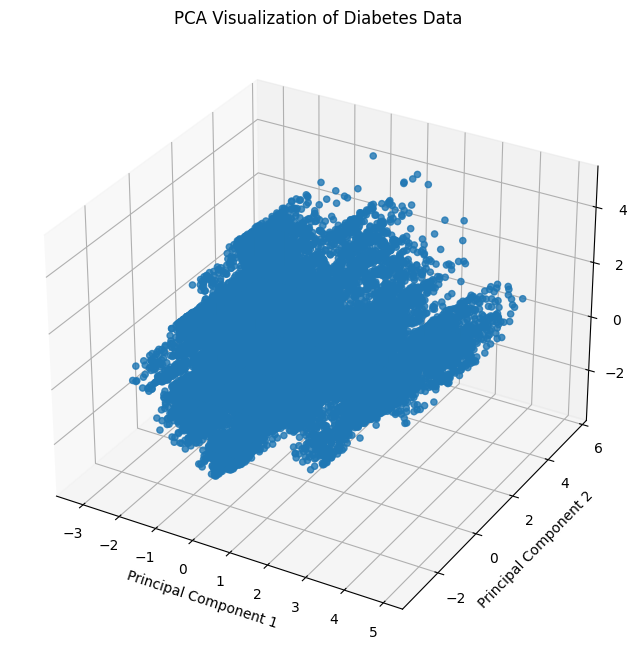

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Select only the numerical columns for PCA
numerical_data = diabetes_data.select_dtypes(include=[np.number])

# Apply PCA to reduce the dimensionality to 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(numerical_data)

# Visualize the data in 3 dimensions
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.8)
ax.set_title('PCA Visualization of Diabetes Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()
